In [ ]:
import pandas as pd 
from mplsoccer.pitch import Pitch

In [ ]:
df = pd.read_csv('events.csv')

In [ ]:
df

,Team,Player,Event,X,Y,X2,Y2
0,Home,Milo,Successful Pass,94,81,96,57
1,Home,Tashriq,Successful Pass,97,48,90,12
2,Home,Byron,Successful Pass,87,13,95,36
3,Home,Tashriq,Successful Pass,96,45,77,91
4,Home,Milo,Successful Pass,73,92,55,93
...,...,...,...,...,...,...,...
146,Home,Sam,Successful Pass,45,55,22,62
147,Home,Messi,Successful Pass,23,65,30,64
148,Home,Sam,Unsuccessful Pass,29,66,17,49
149,Home,Valdo,Unsuccessful Pass,24,16,5,59


In [ ]:
df['Passer'] = df['Player']
df['Recipient'] = df['Player'].shift(-1)

In [ ]:
df

,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...
146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi
147,Home,Messi,Successful Pass,23,65,30,64,Messi,Sam
148,Home,Sam,Unsuccessful Pass,29,66,17,49,Sam,Valdo
149,Home,Valdo,Unsuccessful Pass,24,16,5,59,Valdo,X


In [ ]:
passess = df[df['Event']=='Successful Pass']

In [ ]:
passess

,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...
143,Home,Patti,Successful Pass,41,12,49,51,Patti,Sam
144,Home,Sam,Successful Pass,47,53,47,77,Sam,Milo
145,Home,Milo,Successful Pass,46,78,46,53,Milo,Sam
146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi


In [ ]:
average_locations = passess.groupby('Passer').agg({'X':['mean'],'Y':['mean','count']})

In [ ]:
average_locations.columns = ['x', 'y','count']

In [ ]:
average_locations

,x,y,count
Passer,,,
Byron,74.750000,11.666667,12
Messi,25.500000,44.750000,4
Milo,70.416667,80.916667,12
Patti,59.636364,35.363636,11
Sam,47.000000,54.769231,13
Shabba,78.000000,50.900000,10
Shaheed,30.500000,47.500000,2
Shaquille,52.857143,86.071429,14
Tashriq,91.294118,44.117647,17


In [ ]:
pass_between = passess.groupby(['Passer','Recipient']).count().reset_index

In [ ]:
pass_between

<bound method DataFrame.reset_index of                   Team  Player  Event  X  Y  X2  Y2
Passer Recipient                                   
Byron  Patti         2       2      2  2  2   2   2
       Tashriq       6       6      6  6  6   6   6
       Valdo         3       3      3  3  3   3   3
       X             1       1      1  1  1   1   1
Messi  Milo          1       1      1  1  1   1   1
...                ...     ...    ... .. ..  ..  ..
X      Shabba        2       2      2  2  2   2   2
       Shaheed       1       1      1  1  1   1   1
       Shaquille     1       1      1  1  1   1   1
       Valdo         2       2      2  2  2   2   2
       X             1       1      1  1  1   1   1

[63 rows x 7 columns]>

In [ ]:
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

AttributeError: 'function' object has no attribute 'rename'

In [ ]:
passess

,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...
143,Home,Patti,Successful Pass,41,12,49,51,Patti,Sam
144,Home,Sam,Successful Pass,47,53,47,77,Sam,Milo
145,Home,Milo,Successful Pass,46,78,46,53,Milo,Sam
146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi


In [ ]:
passess.rename( columns={0 :'ID'}, inplace=True )


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
passess

,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...
143,Home,Patti,Successful Pass,41,12,49,51,Patti,Sam
144,Home,Sam,Successful Pass,47,53,47,77,Sam,Milo
145,Home,Milo,Successful Pass,46,78,46,53,Milo,Sam
146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi


In [ ]:
df

,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...
146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi
147,Home,Messi,Successful Pass,23,65,30,64,Messi,Sam
148,Home,Sam,Unsuccessful Pass,29,66,17,49,Sam,Valdo
149,Home,Valdo,Unsuccessful Pass,24,16,5,59,Valdo,X


In [ ]:
df.rename(columns={0 :'id'}, inplace=True )

In [ ]:
df.head()


,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille


In [ ]:
df.rename( columns={0 :'id'}, inplace=True )

In [ ]:
df

,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...
146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi
147,Home,Messi,Successful Pass,23,65,30,64,Messi,Sam
148,Home,Sam,Unsuccessful Pass,29,66,17,49,Sam,Valdo
149,Home,Valdo,Unsuccessful Pass,24,16,5,59,Valdo,X


In [ ]:
df = df.rename({'':'id'}, axis='columns')

In [ ]:
df.columns = ['ID', 'Team', 'Player', 'Event', 'X', 'Y', 'X2', 'Y2', 'Passer', 'Recipient']

ValueError: Length mismatch: Expected axis has 9 elements, new values have 10 elements

In [ ]:
del df['id']

In [ ]:
df

,New_ID,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...,...
146,146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi
147,147,Home,Messi,Successful Pass,23,65,30,64,Messi,Sam
148,148,Home,Sam,Unsuccessful Pass,29,66,17,49,Sam,Valdo
149,149,Home,Valdo,Unsuccessful Pass,24,16,5,59,Valdo,X


In [ ]:
df.rename(columns = {'New_ID':'id'}, inplace = True)

In [ ]:
df

,id,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...,...
146,146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi
147,147,Home,Messi,Successful Pass,23,65,30,64,Messi,Sam
148,148,Home,Sam,Unsuccessful Pass,29,66,17,49,Sam,Valdo
149,149,Home,Valdo,Unsuccessful Pass,24,16,5,59,Valdo,X


In [ ]:
passess

,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille
...,...,...,...,...,...,...,...,...,...
143,Home,Patti,Successful Pass,41,12,49,51,Patti,Sam
144,Home,Sam,Successful Pass,47,53,47,77,Sam,Milo
145,Home,Milo,Successful Pass,46,78,46,53,Milo,Sam
146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi


In [ ]:
passess

,Team,Player,Event,X,Y,X2,Y2,Passer,Recipient,id
0,Home,Milo,Successful Pass,94,81,96,57,Milo,Tashriq,0
1,Home,Tashriq,Successful Pass,97,48,90,12,Tashriq,Byron,1
2,Home,Byron,Successful Pass,87,13,95,36,Byron,Tashriq,2
3,Home,Tashriq,Successful Pass,96,45,77,91,Tashriq,Milo,3
4,Home,Milo,Successful Pass,73,92,55,93,Milo,Shaquille,4
...,...,...,...,...,...,...,...,...,...,...
143,Home,Patti,Successful Pass,41,12,49,51,Patti,Sam,143
144,Home,Sam,Successful Pass,47,53,47,77,Sam,Milo,144
145,Home,Milo,Successful Pass,46,78,46,53,Milo,Sam,145
146,Home,Sam,Successful Pass,45,55,22,62,Sam,Messi,146


In [ ]:
pass_between = passess.groupby(['Passer','Recipient']).id.count().reset_index()

In [ ]:
pass_between

,Passer,Recipient,id
0,Byron,Patti,2
1,Byron,Tashriq,6
2,Byron,Valdo,3
3,Byron,X,1
4,Messi,Milo,1
...,...,...,...
58,X,Shabba,2
59,X,Shaheed,1
60,X,Shaquille,1
61,X,Valdo,2


In [ ]:
pass_between.rename({'id','pass_count'},axis='columns', inplace=True)

TypeError: 'set' object is not callable

In [ ]:
pass_between.rename(columns = {'id':'pass_count'}, inplace = True)

In [ ]:
pass_between

,Passer,Recipient,pass_count
0,Byron,Patti,2
1,Byron,Tashriq,6
2,Byron,Valdo,3
3,Byron,X,1
4,Messi,Milo,1
...,...,...,...
58,X,Shabba,2
59,X,Shaheed,1
60,X,Shaquille,1
61,X,Valdo,2


In [ ]:
pass_between = pass_between.merge(average_locations,left_on='Passer',right_index=True)

In [ ]:
pass_between = pass_between.merge(average_locations,left_on='Recipient',right_index=True)

In [ ]:
pass_between = pass_between.merge(average_locations,left_on='Recipient',right_index=True,suffixes=['','_end'])

In [ ]:
pass_between

,Passer,Recipient,pass_count,x_x,y_x,count_x,x_y,y_y,count_y,x,y,count
0,Byron,Patti,2,74.750000,11.666667,12,59.636364,35.363636,11,59.636364,35.363636,11
5,Messi,Patti,1,25.500000,44.750000,4,59.636364,35.363636,11,59.636364,35.363636,11
9,Milo,Patti,1,70.416667,80.916667,12,59.636364,35.363636,11,59.636364,35.363636,11
21,Sam,Patti,2,47.000000,54.769231,13,59.636364,35.363636,11,59.636364,35.363636,11
28,Shabba,Patti,1,78.000000,50.900000,10,59.636364,35.363636,11,59.636364,35.363636,11
...,...,...,...,...,...,...,...,...,...,...,...,...
29,Shabba,Shaheed,1,78.000000,50.900000,10,30.500000,47.500000,2,30.500000,47.500000,2
59,X,Shaheed,1,61.846154,40.307692,13,30.500000,47.500000,2,30.500000,47.500000,2
41,Tashriq,Byron,3,91.294118,44.117647,17,74.750000,11.666667,12,74.750000,11.666667,12
48,Valdo,Byron,2,54.363636,11.000000,11,74.750000,11.666667,12,74.750000,11.666667,12


In [ ]:
N = 3
pass_between = pass_between.iloc[: , :-N]

In [ ]:
pass_between

,Passer,Recipient,pass_count,x_x,y_x,count_x,x_y,y_y,count_y
0,Byron,Patti,2,74.750000,11.666667,12,59.636364,35.363636,11
5,Messi,Patti,1,25.500000,44.750000,4,59.636364,35.363636,11
9,Milo,Patti,1,70.416667,80.916667,12,59.636364,35.363636,11
21,Sam,Patti,2,47.000000,54.769231,13,59.636364,35.363636,11
28,Shabba,Patti,1,78.000000,50.900000,10,59.636364,35.363636,11
...,...,...,...,...,...,...,...,...,...
29,Shabba,Shaheed,1,78.000000,50.900000,10,30.500000,47.500000,2
59,X,Shaheed,1,61.846154,40.307692,13,30.500000,47.500000,2
41,Tashriq,Byron,3,91.294118,44.117647,17,74.750000,11.666667,12
48,Valdo,Byron,2,54.363636,11.000000,11,74.750000,11.666667,12


In [ ]:
pass_between.columns = ['Passer', 'Recipient', 'pass_count', 'x', 'y', 'count', 'x_end', 'y_end', 'count_end']

In [ ]:
pass_between

,Passer,Recipient,pass_count,x,y,count,x_end,y_end,count_end
0,Byron,Patti,2,74.750000,11.666667,12,59.636364,35.363636,11
5,Messi,Patti,1,25.500000,44.750000,4,59.636364,35.363636,11
9,Milo,Patti,1,70.416667,80.916667,12,59.636364,35.363636,11
21,Sam,Patti,2,47.000000,54.769231,13,59.636364,35.363636,11
28,Shabba,Patti,1,78.000000,50.900000,10,59.636364,35.363636,11
...,...,...,...,...,...,...,...,...,...
29,Shabba,Shaheed,1,78.000000,50.900000,10,30.500000,47.500000,2
59,X,Shaheed,1,61.846154,40.307692,13,30.500000,47.500000,2
41,Tashriq,Byron,3,91.294118,44.117647,17,74.750000,11.666667,12
48,Valdo,Byron,2,54.363636,11.000000,11,74.750000,11.666667,12


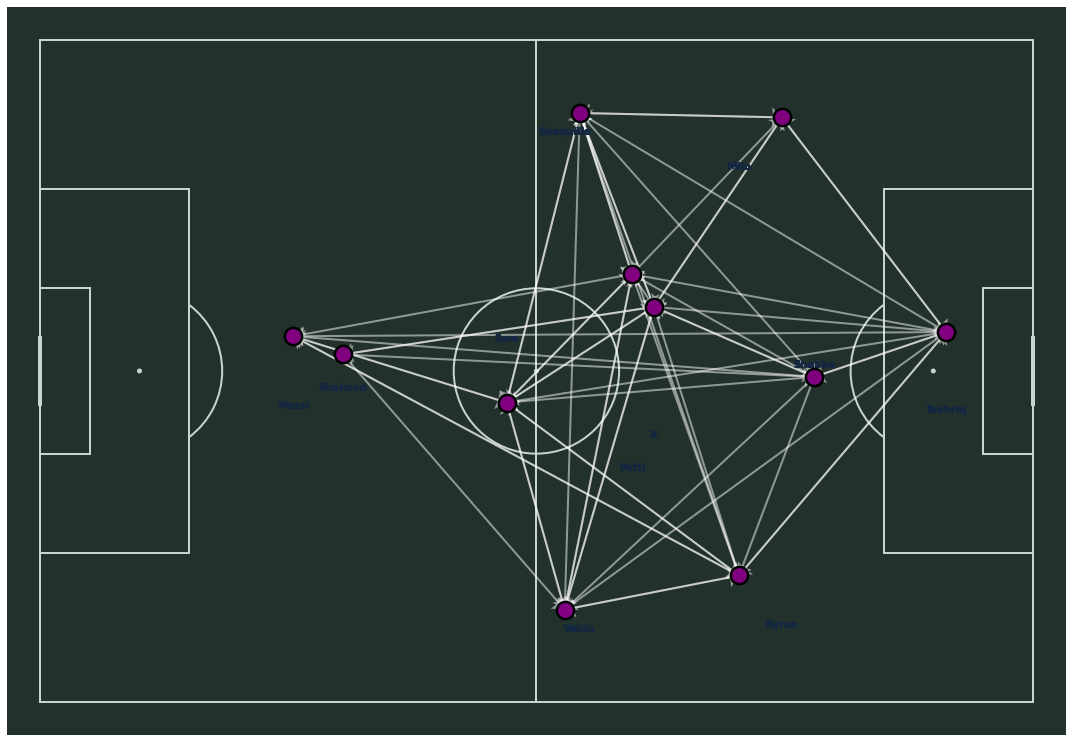

In [ ]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', line_color='#c7d5cc', figsize=(16,11),
        constrained_layout=False, tight_layout=True, pitch_color='#22312b')
fig, ax = pitch.draw()

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,ax=ax,
         width=2, headwidth=10, color='white', zorder=1, alpha=.5)

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
        s=300, color = 'purple', edgecolor='black', linewidth =2.5, alpha=1, zorder=1, ax=ax)


for index, row in pass_between.iterrows():
     pitch.annotate(row.Passer, xy=(1.2*row.x, 80-0.8*row.y), c='#132743', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
fig.set_size_inches(15, 15)

In [3]:
passess

NameError: name 'passess' is not defined